In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
cov = [[5, 0], [0, 5]]
x = np.random.multivariate_normal([2, 2], cov, 1500)

In [3]:
print(len(x))
print(x.shape[1])

1500
2


In [4]:
orig_labels = np.asarray([0]*300 + [1]*300 + [2]*300 + [3]*300 + [4]*300).T

In [5]:

def kmeans_display(x, label):
  k = np.amax(label) + 1
  x0 = x[label == 0, :]
  x1 = x[label == 1, :]
  x2 = x[label == 2, :]
  x3 = x[label == 3, :]
  x4 = x[label == 4, :]
  plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
  plt.plot(x1[:, 0], x1[:, 1], 'go', markersize = 4, alpha = .8)
  plt.plot(x2[:, 0], x2[:, 1], 'rs', markersize = 4, alpha = .8)
  plt.plot(x3[:, 0], x3[:, 1], 'd', markersize = 4, alpha = .8)
  plt.plot(x4[:, 0], x4[:, 1], 's', markersize = 4, alpha = .8)
  plt.axis('equal')
  plt.plot()
  plt.show() 

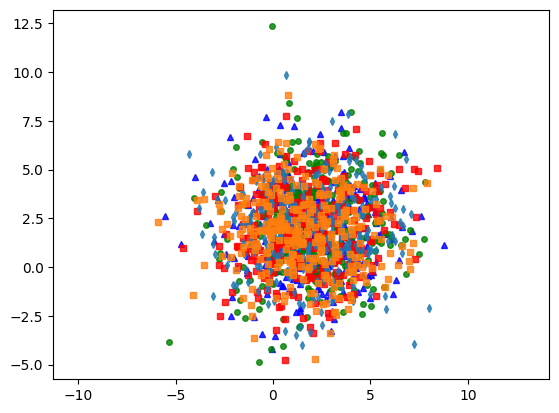

In [6]:
kmeans_display(x, orig_labels)

In [7]:
def kmeans_init_centers(x, k):
  return x[np.random.choice(x.shape[0], k, replace = False)]

In [9]:
k = 5

In [10]:
a = kmeans_init_centers(x, k)
print(a)
print(a[0])

[[ 1.01552544  0.60707836]
 [-0.28440107  3.5384127 ]
 [ 3.83860952  0.74533114]
 [ 5.06232446 -0.2133549 ]
 [ 6.43874316  0.0943302 ]]
[1.01552544 0.60707836]


In [11]:
def kmeans_assign_labels(x, center):
  kc = []
  # tinh khoang cach tung diem den cac center
  for i in range(0, len(x)):
    kc1 = []
    for j in range(0, len(center)):
      kc1.append(math.dist(x[i], center[j]))
    kc.append(kc1)
  kc = np.resize(kc, (len(x),len(center)))
  new_label = []
  # tim gia tri khoang cach nho nhat
  # gan diem ay voi k/c den center nho nhat
  for i in range(0, len(x)):
      array = kc[i]
      min = array[0]
      vt = 0
      for j in range(1, len(array)):
        if min > array[j]:
          min = array[j]
          vt = j
      new_label.append(vt)
  new_label = np.array(new_label)
  return new_label


In [12]:
# def kmeans_assign_labels(x, centers):
#   d = cdist(x, centers)
#   return np.argmin(d, axis=0), np.argmin(d, axis =1), d

In [16]:
def kmeans_update_centers(x, label, k):
  centers = np.zeros((k, x.shape[1]))
  for i in range(k):
    xi = x[label==i, :]
    centers[i, :] = np.mean(xi, axis=0)
  return centers

In [17]:
def has_converged(centers, new_centers):
  count = 0
  for i in range(0, len(centers)):
    a1 = centers[i]
    a2 = new_centers[i]
    for j in range(0, 2):
      if a1[j] == a2[j]:
        count = count + 1
  if count == 2*len(centers):
    return True
  else: return False


In [18]:
def kmeans(x, k):
  centers = [kmeans_init_centers(x, k)]
  labels = []
  while True:
    labels.append(kmeans_assign_labels(x, centers[-1]))
    new_centers = kmeans_update_centers(x, labels[-1], k)
    if has_converged(centers[-1], new_centers) == True:
      break
    centers.append(new_centers)
  return (centers, labels)

In [19]:
(centers, labels) = kmeans(x, k)

In [20]:
print(centers[-1])
print(labels[-1])

[[ 3.36126336  0.14811476]
 [ 4.77934712  3.18405421]
 [ 0.39152804 -0.48165112]
 [-0.95268512  2.43342318]
 [ 1.57087717  4.02775092]]
[0 0 1 ... 4 0 4]


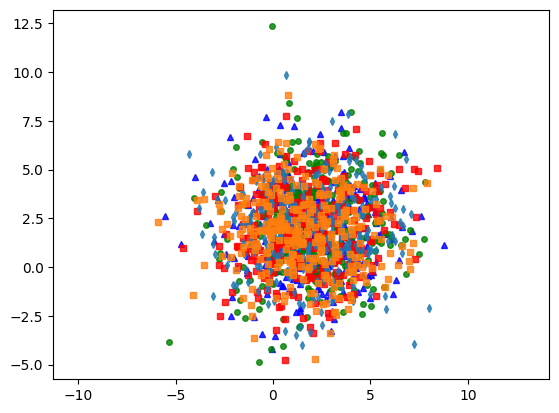

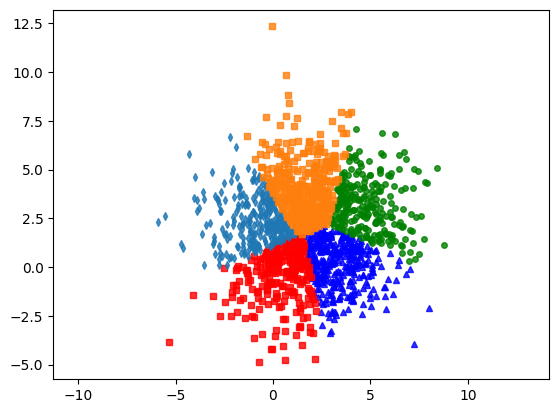

In [21]:
kmeans_display(x, orig_labels)
kmeans_display(x, labels[-1])


In [22]:
from scipy.spatial.distance import cdist

In [23]:
def kmean_assign_labels(x, centers):
  d = cdist(x, centers)
  return np.argmin(d, axis=1)

In [24]:
def kmean_update_centers(x, labels, K):
  centers = np.zeros((K, x.shape[1]))
  for k in range(K):
    xk=x[labels==k, :]
    centers[k, :] = np.mean(xk, axis=0)
  return centers

In [25]:
def ha_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [26]:
def kmean(x, k):
  centers = [ kmeans_init_centers(x, k)]
  labels = []
  while True:
    labels.append(kmean_assign_labels(x, centers[-1]))
    new_centers = kmean_update_centers(x, labels[-1], k)
    if ha_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
  return (centers, labels)

In [27]:
(b1, b2) = kmean(x, k)

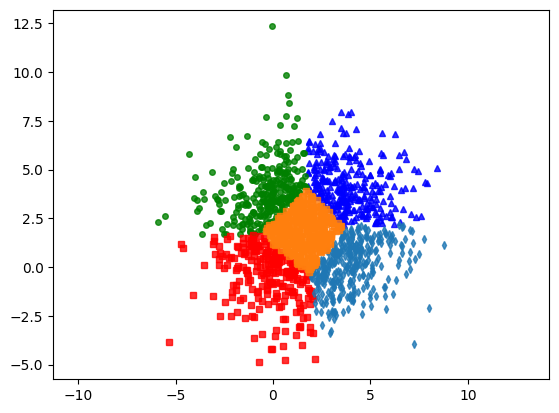

In [28]:
kmeans_display(x, b2[-1])